In [39]:
import networkx as nx
# from netgraph import Graph
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [40]:
N_INPUT = 2
N_OUTPUT = 2
connectome = np.array([[ 4.6771,  4.6771,  0.0000,  0.0000,  0.0000],
                       [ 4.6771,  4.6771,  0.0000,  0.0000,  0.0000],
                       [ 3.1797,  3.1797,  0.0000,  0.0000,  0.0000],
                       [-3.6333, -3.6333,  7.6649,  4.7073,  1.8020],
                       [ 3.9005,  3.9005, -1.2367, -3.7195,  3.1055]])
print(f"{connectome=}")
# connectome = np.round(connectome)
clock_neuron = np.array([0.0804, 0.0804, 7.6967, 4.3912, 1.5926])
# clock_neuron = np.round(clock_neuron)

connectome=array([[ 4.6771,  4.6771,  0.    ,  0.    ,  0.    ],
       [ 4.6771,  4.6771,  0.    ,  0.    ,  0.    ],
       [ 3.1797,  3.1797,  0.    ,  0.    ,  0.    ],
       [-3.6333, -3.6333,  7.6649,  4.7073,  1.802 ],
       [ 3.9005,  3.9005, -1.2367, -3.7195,  3.1055]])


In [41]:
EDGES = []
for i in range(connectome.shape[0]):
    for j in range(connectome.shape[0]):
        weight = connectome[i, j]
        if weight != 0:
            print(f"connected neuron_{j} --[{weight}]--> neuron_{i}")
            EDGES.append((f"neuron_{j}", f"neuron_{i}", weight))

for i in range(connectome.shape[0]):
    weight = clock_neuron[i]
    if weight != 0:
        print(f"clock --[{weight}]--> neuron_{i}")
        EDGES.append((f"clock", f"neuron_{i}", weight))

connected neuron_0 --[4.6771]--> neuron_0
connected neuron_1 --[4.6771]--> neuron_0
connected neuron_0 --[4.6771]--> neuron_1
connected neuron_1 --[4.6771]--> neuron_1
connected neuron_0 --[3.1797]--> neuron_2
connected neuron_1 --[3.1797]--> neuron_2
connected neuron_0 --[-3.6333]--> neuron_3
connected neuron_1 --[-3.6333]--> neuron_3
connected neuron_2 --[7.6649]--> neuron_3
connected neuron_3 --[4.7073]--> neuron_3
connected neuron_4 --[1.802]--> neuron_3
connected neuron_0 --[3.9005]--> neuron_4
connected neuron_1 --[3.9005]--> neuron_4
connected neuron_2 --[-1.2367]--> neuron_4
connected neuron_3 --[-3.7195]--> neuron_4
connected neuron_4 --[3.1055]--> neuron_4
clock --[0.0804]--> neuron_0
clock --[0.0804]--> neuron_1
clock --[7.6967]--> neuron_2
clock --[4.3912]--> neuron_3
clock --[1.5926]--> neuron_4


In [46]:
g = nx.DiGraph((x, y, {'weight': v}) for x, y, v in EDGES)
# pos = nx.spring_layout(g, k=1, iterations=20)
pos = nx.circular_layout(g)

print(f"{g.nodes=}")

INPUT_NODES = [f"neuron_{connectome.shape[0]-i-1}" for i in range(N_INPUT)]
OUTPUT_NODES = [f"neuron_{i}" for i in range(N_OUTPUT)]

g.nodes=NodeView(('neuron_0', 'neuron_1', 'neuron_2', 'neuron_3', 'neuron_4', 'clock'))


In [47]:
def nodeOutlineColor(nodeName: str) -> str:
    global INPUT_NODES, OUTPUT_NODES
    if nodeName in INPUT_NODES: return "blue"
    if nodeName in OUTPUT_NODES: return "red"
    if nodeName == "clock": return "green"
    return "gray"

edgeColors = [nodeOutlineColor(nodename) for nodename in g.nodes]

# nx.draw(g, connectionstyle='arc3, rad = 0.1', pos=pos, edge_color=edgeColors)
# plt.show()

In [48]:
EDGES

[('neuron_0', 'neuron_0', 4.6771),
 ('neuron_1', 'neuron_0', 4.6771),
 ('neuron_0', 'neuron_1', 4.6771),
 ('neuron_1', 'neuron_1', 4.6771),
 ('neuron_0', 'neuron_2', 3.1797),
 ('neuron_1', 'neuron_2', 3.1797),
 ('neuron_0', 'neuron_3', -3.6333),
 ('neuron_1', 'neuron_3', -3.6333),
 ('neuron_2', 'neuron_3', 7.6649),
 ('neuron_3', 'neuron_3', 4.7073),
 ('neuron_4', 'neuron_3', 1.802),
 ('neuron_0', 'neuron_4', 3.9005),
 ('neuron_1', 'neuron_4', 3.9005),
 ('neuron_2', 'neuron_4', -1.2367),
 ('neuron_3', 'neuron_4', -3.7195),
 ('neuron_4', 'neuron_4', 3.1055),
 ('clock', 'neuron_0', 0.0804),
 ('clock', 'neuron_1', 0.0804),
 ('clock', 'neuron_2', 7.6967),
 ('clock', 'neuron_3', 4.3912),
 ('clock', 'neuron_4', 1.5926)]

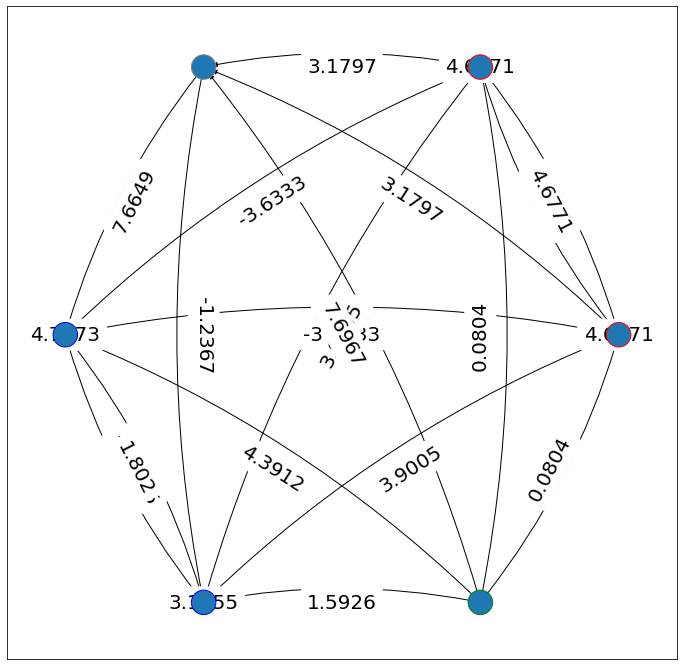

In [54]:
# plt.figure(dpi=125, figsize=(12,8))
fig = plt.figure(3,figsize=(12,12)) 
nodes = nx.draw_networkx_nodes(g, pos, nodelist=g.nodes, edgecolors=edgeColors, cmap="ocean", vmin=-11, vmax=15,node_size=600)
edges = nx.draw_networkx_edges(g, pos, connectionstyle='arc3, rad = 0.1')
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, font_size=20, font_family="sans-serif")
# plt.show(dpi=300)
plt.show()